In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt

# Load Dataset

In [39]:
df = pd.read_csv("Dataset/Healthcare-Diabetes.csv")
print("Preview Data : ")
print(df.head())

Preview Data : 
   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [40]:
print("Jumlah data missing value tiap kolom: ")
print(df.isnull().sum())

Jumlah data missing value tiap kolom: 
Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [41]:
x = df.drop(["Outcome", "Id"], axis=1)
y = df["Outcome"]
print(x.head())

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.3, random_state=42, stratify=y
)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


# Training Model Random Forest

In [42]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model.fit(x_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred = model.predict(x_test)

In [44]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test,y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy
0.9831528279181708
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       545
           1       0.98      0.97      0.98       286

    accuracy                           0.98       831
   macro avg       0.98      0.98      0.98       831
weighted avg       0.98      0.98      0.98       831

Confusion Matrix
[[540   5]
 [  9 277]]


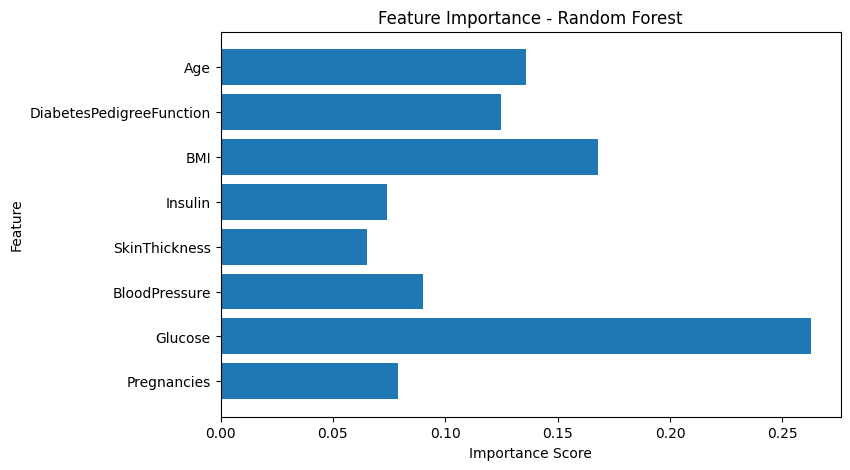

In [45]:
importances = model.feature_importances_
feature_names = x.columns
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [46]:

data_baru = pd.DataFrame([{
    "Pregnancies": 2,
    "Glucose": 132,
    "BloodPressure": 72,
    "SkinThickness": 28,
    "Insulin": 130,
    "BMI": 32.5,
    "DiabetesPedigreeFunction": 0.45,
    "Age": 29
}])

prediksi = model.predict(data_baru)

kategorical = "Positif" if prediksi[0] == 1 else "Negatif"

print(f"hasil Prediksi : {kategorical}")

hasil Prediksi : Positif


# Importing

In [47]:
# Model
import joblib
joblib.dump(model, "Model.pkl")

# Evaluasi
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
report = classification_report(y_test, y_pred, output_dict=True)
joblib.dump({
    "precision" : precision,
    "recall" : recall,
    "f1_score" : f1,
    "report" : report
}, "Evaluation.pkl")
acc = accuracy_score(y_test,y_pred)
joblib.dump(acc,"Acc.pkl")


['Acc.pkl']